In [1]:
# ! pip install openpyxl

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [8]:
sheet_paths=[ 'PDE_FIND.xlsx',
             'Freqdom.xlsx',
              'DeepMoD.xlsx',
             'GKFL0.xlsx']

snrs = ["No noise",20000,15000,10000,7500,5000,3000,2000,1000,800,500,300,200,100,90,80,70,60,50,40,30,20,10,8,6,5,4,3,2,1,0.9,0.8,0.75,0.7,0.6,0.5,0.4,0.3,0.25,0.2,0.1]

In [9]:
def error_metric(true_coeff,pred_coeff,weights):
    wrmse = mean_squared_error(true_coeff,pred_coeff,sample_weight=weights,squared=False)
    return wrmse

def pred_terms_validation(true,pred):
    for i in range(len(true)):
        if true[i]==0 and pred[i]!=0:
            return "No"
        if true[i]!=0 and pred[i]==0:
            return "No"
    return "Yes"

Model:  PDE_FIND
Model:  Freqdom
Model:  DeepMoD
Model:  GKFL0


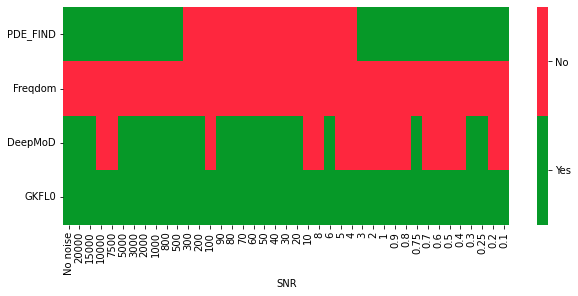

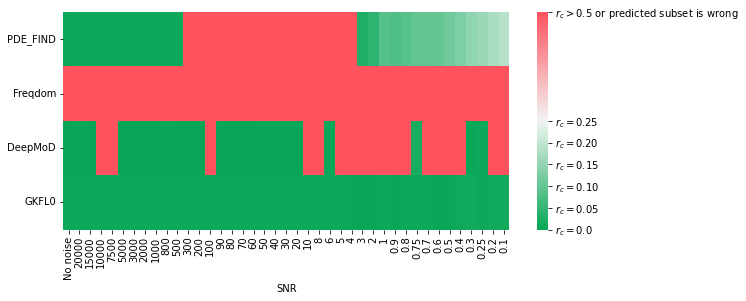

In [48]:
# Simple PDE

weights = [1]*12

true_coeff = [0]*12
true_coeff[1]=-0.8

plot_max=0.5

plt.figure(figsize=(10,4))
fig = plt.figure(1)
ax = fig.add_subplot(111)
terms_df = pd.DataFrame(columns=snrs,index=[sheet_path[:-5] for sheet_path in sheet_paths])


errors={}
for sheet_path in sheet_paths:
    print("Model: ",sheet_path[:-5])
    xls = pd.ExcelFile(sheet_path)
    df = pd.read_excel(xls, 'Simplepde eqn')
    preds = df.drop(["Unnamed: 0","SNR"],axis=1).values
    
    error=[]
    pred_terms_val=[]
    terms_df_values=[]
    for i in range(len(preds)):
        error_i = error_metric(true_coeff,preds[i],weights)
        error.append(error_i)
        pred_terms_val_i = pred_terms_validation(true_coeff,preds[i])
        pred_terms_val.append(pred_terms_val_i)
        if pred_terms_val_i=="Yes":
            terms_df_values.append(mean_squared_error(true_coeff,preds[i],squared=False))
        else:
            terms_df_values.append(float(plot_max))
    df["Predict terms"] = pred_terms_val
    terms_df.loc[sheet_path[:-5]] = terms_df_values
    df["WRMSE"]=error
    errors[sheet_path[:-5]]=error

 
value_to_int ={'Yes': 0, 'No': 1}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=False,n=2)
ax = sns.heatmap(terms_df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()

plt.figure(figsize=(10,4))
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
cmap = sns.diverging_palette(h_neg=138, h_pos=10, s=99, l=60, sep=5, as_cmap=True)
ax = sns.heatmap(terms_df, cmap=cmap,vmin=0,vmax=plot_max) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([0,0.05,0.1,0.15,0.2,0.25,0.5])
colorbar.ax.set_yticklabels(["$r_c=0.0$","$r_c=0.05$","$r_c=0.10$","$r_c=0.15$","$r_c=0.20$","$r_c=0.25$","$r_c>0.5$ or predicted subset is wrong"])
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()


Model:  PDE_FIND
Model:  Freqdom
Model:  DeepMoD
Model:  GKFL0


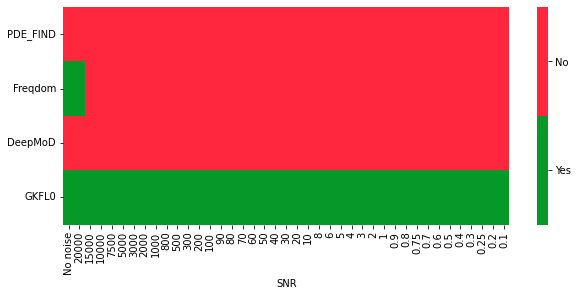

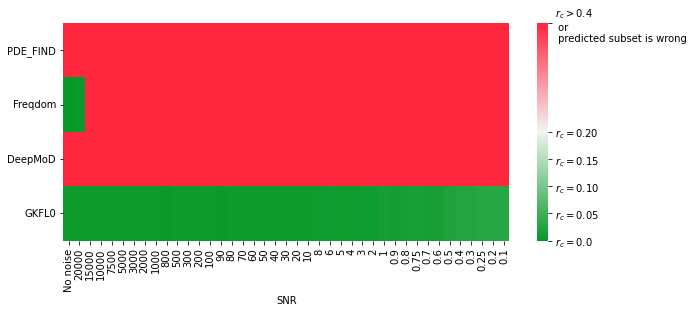

In [62]:
# Heat eqn

weights = [1]*12
weights[2]=1

true_coeff = [0]*12
true_coeff[2]=0.15

plot_max=0.4

plt.figure(figsize=(10,4))
fig = plt.figure(1)
ax = fig.add_subplot(111)
terms_df = pd.DataFrame(columns=snrs,index=[sheet_path[:-5] for sheet_path in sheet_paths])


errors={}
for sheet_path in sheet_paths:
    print("Model: ",sheet_path[:-5])
    xls = pd.ExcelFile(sheet_path)
    df = pd.read_excel(xls, 'Heat eqn')
    preds = df.drop(["Unnamed: 0","SNR"],axis=1).values
    
    error=[]
    pred_terms_val=[]
    terms_df_values=[]
    for i in range(len(preds)):
        error_i = error_metric(true_coeff,preds[i],weights)
        error.append(error_i)
        pred_terms_val_i = pred_terms_validation(true_coeff,preds[i])
        pred_terms_val.append(pred_terms_val_i)
        if pred_terms_val_i=="Yes":
            terms_df_values.append(mean_squared_error(true_coeff,preds[i],squared=False))
        else:
            terms_df_values.append(float(plot_max))
    df["Predict terms"] = pred_terms_val
    terms_df.loc[sheet_path[:-5]] = terms_df_values
    df["WRMSE"]=error
    errors[sheet_path[:-5]]=error

value_to_int ={'Yes': 0, 'No': 1}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=False,n=2)
ax = sns.heatmap(terms_df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()

plt.figure(figsize=(10,4))
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
ax = sns.heatmap(terms_df, cmap=cmap,vmin=0,vmax=plot_max) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([0,0.05,0.1,0.15,0.2,0.4])
colorbar.ax.set_yticklabels(["$r_c=0.0$","$r_c=0.05$","$r_c=0.10$","$r_c=0.15$","$r_c=0.20$","$r_c>0.4$ \n or \n predicted subset is wrong"])
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()

Model:  PDE_FIND
Model:  Freqdom
Model:  DeepMoD
Model:  GKFL0


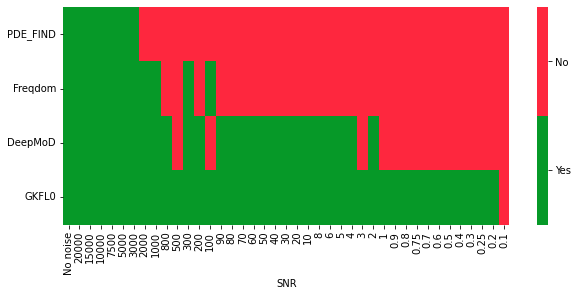

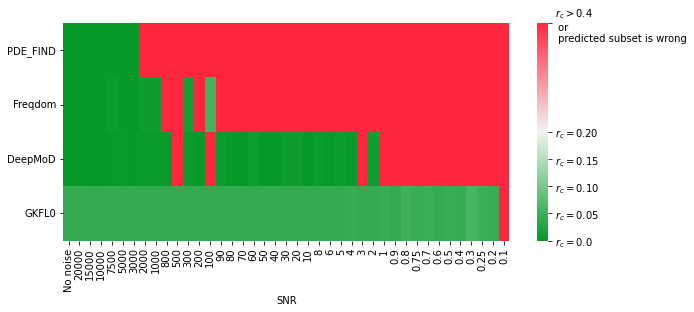

In [63]:
# Burgers eqn

weights = [1]*12
weights[2]=1
weights[6]=1

true_coeff = [0]*12
true_coeff[2]=0.1
true_coeff[6]=-1

plot_max=0.4

plt.figure(figsize=(10,4))
fig = plt.figure(1)
ax = fig.add_subplot(111)
terms_df = pd.DataFrame(columns=snrs,index=[sheet_path[:-5] for sheet_path in sheet_paths])


errors={}
for sheet_path in sheet_paths:
    print("Model: ",sheet_path[:-5])
    xls = pd.ExcelFile(sheet_path)
    df = pd.read_excel(xls, 'Burgers eqn')
    preds = df.drop(["Unnamed: 0","SNR"],axis=1).values
    
    error=[]
    pred_terms_val=[]
    terms_df_values=[]
    for i in range(len(preds)):
        error_i = error_metric(true_coeff,preds[i],weights)
        error.append(error_i)
        pred_terms_val_i = pred_terms_validation(true_coeff,preds[i])
        pred_terms_val.append(pred_terms_val_i)
        if pred_terms_val_i=="Yes":
            terms_df_values.append(mean_squared_error(true_coeff,preds[i],squared=False))
        else:
            terms_df_values.append(float(plot_max))
    df["Predict terms"] = pred_terms_val
    terms_df.loc[sheet_path[:-5]] = terms_df_values
    df["WRMSE"]=error
    errors[sheet_path[:-5]]=error

 
value_to_int ={'Yes': 0, 'No': 1}
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=False,n=2)
ax = sns.heatmap(terms_df.replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()

plt.figure(figsize=(10,4))
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
ax = sns.heatmap(terms_df, cmap=cmap,vmin=0,vmax=plot_max) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([0,0.05,0.1,0.15,0.2,0.4])
colorbar.ax.set_yticklabels(["$r_c=0.0$","$r_c=0.05$","$r_c=0.10$","$r_c=0.15$","$r_c=0.20$","$r_c>0.4$ \n or \n predicted subset is wrong"])
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()


Model:  GKFL0
Model:  GKFL0opt


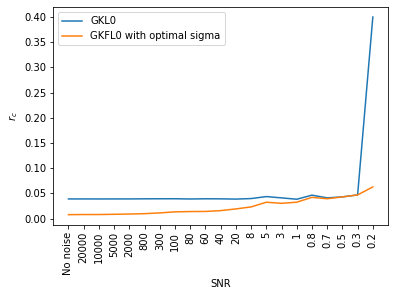

In [52]:
# Burgers eqn

weights = [1]*12
weights[2]=1
weights[6]=1

true_coeff = [0]*12
true_coeff[2]=0.1
true_coeff[6]=-1

plot_max=0.4

fig = plt.figure(1)
ax = fig.add_subplot(111)
terms_df = pd.DataFrame(columns=snrs,index=[sheet_path[:-5] for sheet_path in sheet_paths])


errors={}
for sheet_path in ['GKFL0.xlsx','GKFL0opt.xlsx']:
    print("Model: ",sheet_path[:-5])
    xls = pd.ExcelFile(sheet_path)
    df = pd.read_excel(xls, 'Burgers eqn')
    preds = df.drop(["Unnamed: 0","SNR"],axis=1).values
    
    error=[]
    pred_terms_val=[]
    terms_df_values=[]
    for i in range(len(preds)):
        error_i = error_metric(true_coeff,preds[i],weights)
        error.append(error_i)
        pred_terms_val_i = pred_terms_validation(true_coeff,preds[i])
        pred_terms_val.append(pred_terms_val_i)
        if pred_terms_val_i=="Yes":
            terms_df_values.append(mean_squared_error(true_coeff,preds[i],squared=False))
        else:
            terms_df_values.append(float(plot_max))
    df["Predict terms"] = pred_terms_val
    terms_df.loc[sheet_path[:-5]] = terms_df_values
    df["WRMSE"]=error
    errors[sheet_path[:-5]]=error

    
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
plt.plot([snrs[0]]+snrs[1::2],list(terms_df.loc["GKFL0"])[0::2])
plt.plot([snrs[0]]+snrs[1::2],list(terms_df.loc["GKFL0opt"])[0::2])
plt.legend(["GKL0","GKFL0 with optimal sigma"])
plt.xlabel("SNR")
plt.ylabel("$r_c$")
plt.xticks(rotation=90)
plt.show()

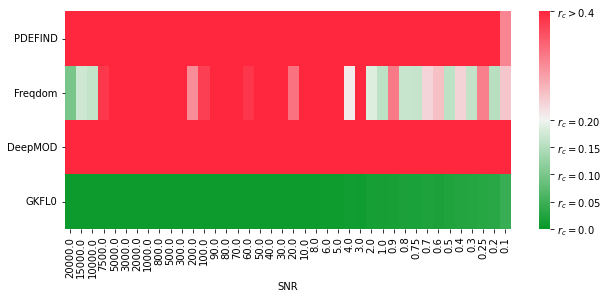

In [59]:
# Heat - 30 realizations

plot_max=0.4

xls = pd.ExcelFile('PDEs 30 realizations average rmse.xlsx')
df = pd.read_excel(xls, 'Heat').T
df.columns = df.iloc[0]
df = df[1:]


plt.figure(figsize=(10,4))
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
ax = sns.heatmap(df, cmap=cmap,vmin=0,vmax=plot_max) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([0,0.05,0.1,0.15,0.2,0.4])
colorbar.ax.set_yticklabels(["$r_c=0.0$","$r_c=0.05$","$r_c=0.10$","$r_c=0.15$","$r_c=0.20$","$r_c>0.4$"])
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()

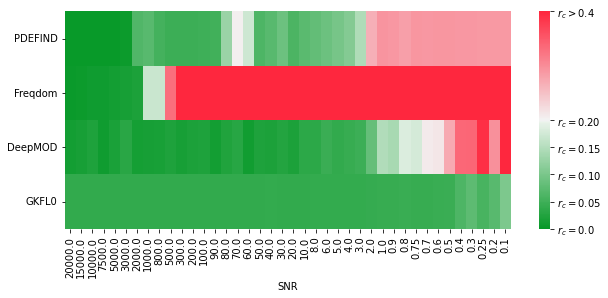

In [60]:
# Burgers - 30 realizations

plot_max=0.4

xls = pd.ExcelFile('PDEs 30 realizations average rmse.xlsx')
df = pd.read_excel(xls, 'Burgers').T
df.columns = df.iloc[0]
df = df[1:]

plt.figure(figsize=(10,4))
terms_df = terms_df.apply(pd.to_numeric, errors='coerce')
cmap = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
ax = sns.heatmap(df, cmap=cmap,vmin=0,vmax=plot_max) 
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([0,0.05,0.1,0.15,0.2,0.4])
colorbar.ax.set_yticklabels(["$r_c=0.0$","$r_c=0.05$","$r_c=0.10$","$r_c=0.15$","$r_c=0.20$","$r_c>0.4$"])
plt.xlabel("SNR")
plt.yticks(rotation=0) 
plt.show()